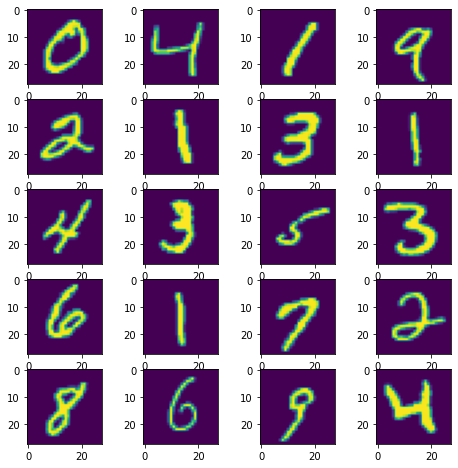

In [4]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Flatten
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i])
plt.show()

In [6]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
y_train = to_categorical(y_train)

x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
y_test = to_categorical(y_test)

In [7]:
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3,3)
    sizeOfPool = (2,2)
    noOfNodes = 784

    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(28,28,1),activation='relu')))
    model.add((Conv2D(noOfFilters,sizeOfFilter1,activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='relu')))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(noOfNodes,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10,activation = 'softmax'))
    opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])

    return model

model = myModel()

model.fit(x_train,y_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 17s 7ms/step - loss: 0.4078 - accuracy: 0.8767
Epoch 2/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1367 - accuracy: 0.9590
Epoch 3/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1207 - accuracy: 0.9649
Epoch 4/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1132 - accuracy: 0.9679


In [8]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0462 - accuracy: 0.9856


[0.046160921454429626, 0.9855999946594238]

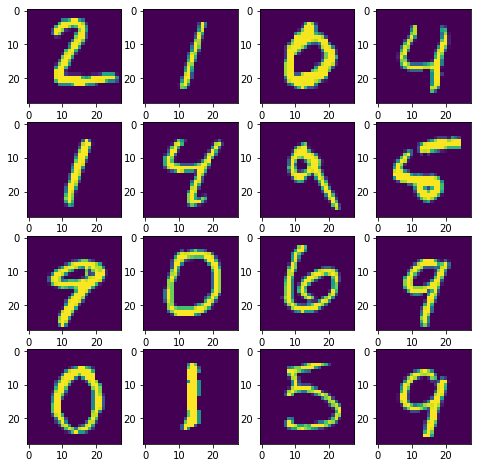

[2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9]


In [11]:
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 4

for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_test[i])
plt.show()

prediction = model.predict(x_test[1:17])
y = []

for i in prediction:
    MaxPosition=np.argmax(i)
    y.append(MaxPosition)  

print(y)
    